In [124]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df_cop = pd.read_csv("../datasets/LST_Copernicus.csv")
df_mod = pd.read_csv("../datasets/LST_MODIS.csv")
df_meteo = pd.read_csv("../datasets/meteostat_tempratures.csv")


In [126]:
df_cop['time'] = pd.to_datetime(df_cop['time'])
df_mod['time'] = pd.to_datetime(df_mod['time'])
df_meteo['time'] = pd.to_datetime(df_meteo['time'])


df_cop.set_index('time', inplace=True)
df_mod.set_index('time', inplace=True)
df_meteo.set_index('time', inplace=True)

<Axes: xlabel='time'>

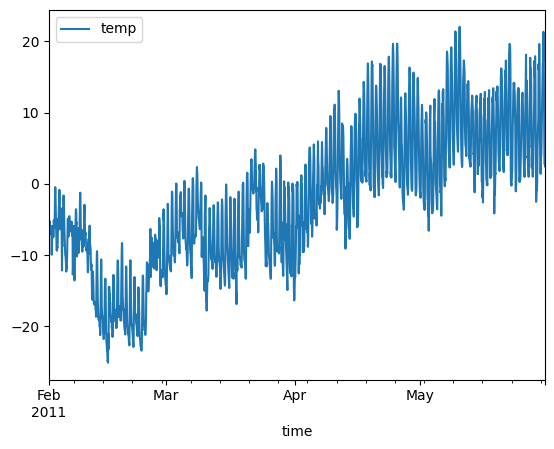

In [127]:
df_cop.plot()

<Axes: xlabel='time'>

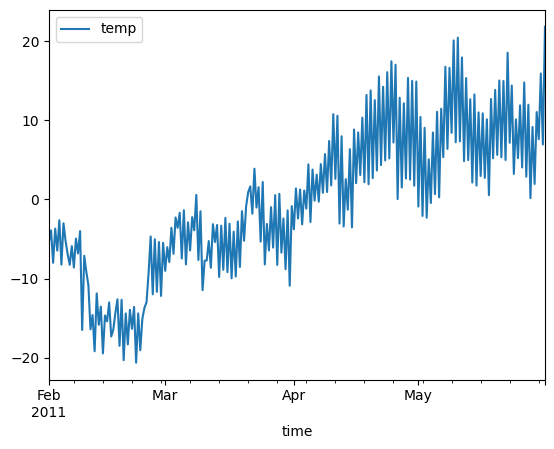

In [128]:
df_mod.plot()

<Axes: xlabel='time'>

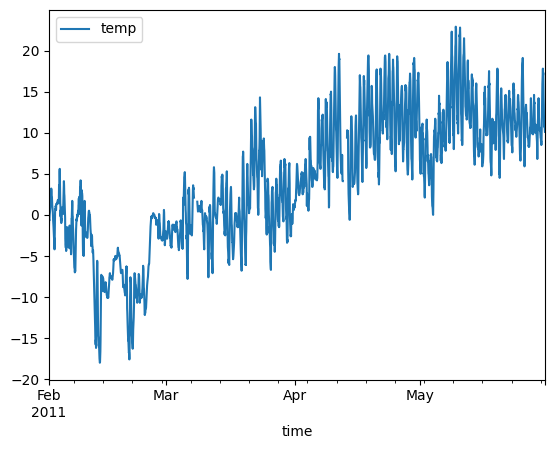

In [129]:
df_meteo.plot()

In [130]:
df_meteo.head()

,temp
time,
2011-02-01 00:00:00,-1.4
2011-02-01 01:00:00,-0.6
2011-02-01 02:00:00,-0.7
2011-02-01 03:00:00,-0.6
2011-02-01 04:00:00,0.0


In [131]:
df_cop.head()

,temp
time,
2011-02-01 00:00:00,-4.921973
2011-02-01 01:00:00,-6.254889
2011-02-01 02:00:00,-6.072241
2011-02-01 03:00:00,-5.648779
2011-02-01 04:00:00,-5.243689


In [132]:
# plt.plot(df_cop.index,df_cop['temp'], label='copernicus')
# plt.plot(df_cop.index,df_meteo['temp'], label='meteostat')
# plt.legend()
# plt.show()

In [133]:
df_meteo.head()

,temp
time,
2011-02-01 00:00:00,-1.4
2011-02-01 01:00:00,-0.6
2011-02-01 02:00:00,-0.7
2011-02-01 03:00:00,-0.6
2011-02-01 04:00:00,0.0


In [134]:
meteo_daily = df_meteo.resample('D').mean()
cop_daily = df_cop.resample('D').mean()
mod_daile = df_mod.resample('D').mean()

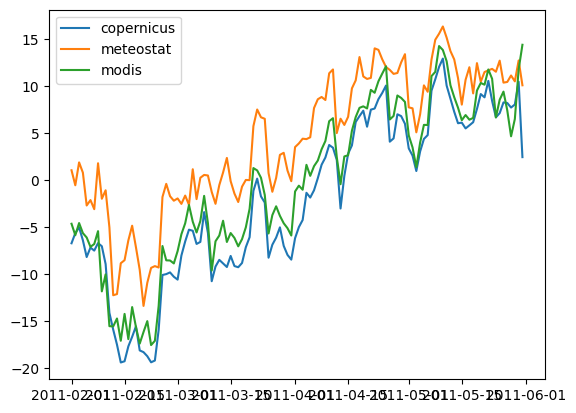

In [135]:
plt.plot(cop_daily.index,cop_daily['temp'], label='copernicus')
plt.plot(cop_daily.index,meteo_daily['temp'], label='meteostat')
plt.plot(cop_daily.index,mod_daile['temp'], label='modis')
plt.legend()
plt.show()

In [136]:
avg_temp_df = meteo_daily

In [137]:
meteostat = meteo_daily['temp'].tolist()
copernicus = cop_daily['temp'].tolist()
modis = mod_daile['temp'].tolist()


print(len(meteostat),len(copernicus),len(modis))

120 120 120


In [138]:
avg_temp = []
tempratures = []
for x in range(120):
    avg_temp.append(((meteostat[x]+copernicus[x]+modis[x])/3))
    tempratures.append([meteostat[x],copernicus[x],modis[x]])

In [139]:
avg_temp_df['temp'] = avg_temp

In [140]:
avg_temp_df.head()

,temp
time,
2011-02-01,-3.421308
2011-02-02,-4.000546
2011-02-03,-2.556825
2011-02-04,-3.731905
2011-02-05,-5.645168


# GDD formula: GDD = (T_max + T_min)/2 - T_base


In [141]:
import numpy as np

In [142]:
gdd = []
base = 5
cumulative_gdd = 0  # Initialize cumulative GDD

for x in tempratures:
    daily_avg_temp = (max(x) + min(x)) / 2  # Average of max and min temp
    daily_gdd = max(0, daily_avg_temp - base)  # Ensure GDD is not negative
    cumulative_gdd += daily_gdd  # Add daily GDD to cumulative total
    gdd.append(cumulative_gdd)  # Store cumulative GDD

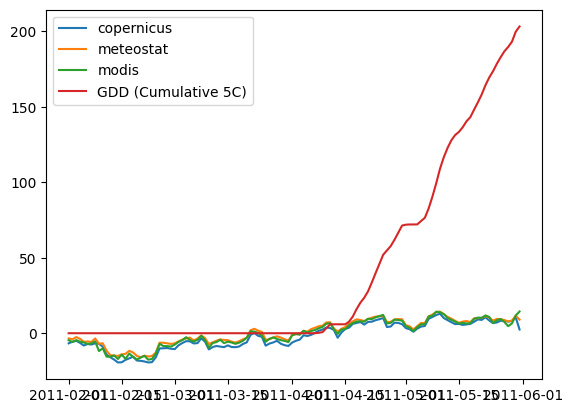

In [143]:
plt.plot(cop_daily.index, cop_daily['temp'], label='copernicus')
plt.plot(cop_daily.index, meteo_daily['temp'], label='meteostat')
plt.plot(cop_daily.index, mod_daile['temp'], label='modis')  # Fixed typo
plt.plot(cop_daily.index, gdd, label='GDD (Cumulative 5C)')  # Plot cumulative GDD
plt.legend()
plt.show()

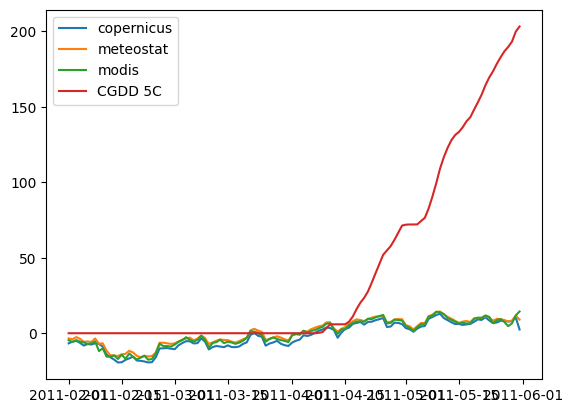

In [144]:
base = 5
cgdd = []
cumulative_gdd = 0  # Initialize cumulative GDD

# Loop through the temperature data starting from the desired start of the growing season
for x in tempratures:
    daily_avg_temp = (max(x) + min(x)) / 2  # Average of max and min temp
    daily_gdd = max(0, daily_avg_temp - base)  # Ensure GDD is not negative
    cumulative_gdd += daily_gdd  # Add daily GDD to cumulative total
    cgdd.append(cumulative_gdd)  # Store cumulative GDD (CGDD)

# Plot the temperature data and CGDD
plt.plot(cop_daily.index, cop_daily['temp'], label='copernicus')
plt.plot(cop_daily.index, meteo_daily['temp'], label='meteostat')
plt.plot(cop_daily.index, mod_daile['temp'], label='modis')
plt.plot(cop_daily.index, cgdd, label='CGDD 5C')  # Plot CGDD
plt.legend()
plt.show()

In [145]:
if gdd == cgdd:
    print('yes')

yes
